# All-NBA Classificator

First of all, I will focus on All-NBA team predictions but my analyst will also consider All-Defensive and All-Rookie teams.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\tomai\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
end_of_season_teams = pd.read_csv(r'C:\Users\tomai\Downloads\End of Season Teams.csv')
player_per_game = pd.read_csv(r'C:\Users\tomai\Downloads\Player Per Game.csv.zip')
player_play_by_play = pd.read_csv(r'C:\Users\tomai\Downloads\Player Play By Play.csv.zip')
team_summaries = pd.read_csv(r'C:\Users\tomai\Downloads\Team Summaries.csv')

In [3]:
# I will focus on NBA between 1980 and 2023
end_of_season_teams = end_of_season_teams[end_of_season_teams['season'] > 1980]
player_per_game = player_per_game[(player_per_game['season'] > 1980) & (player_per_game['season'] < 2023)]
player_play_by_play = player_play_by_play[(player_play_by_play['season'] > 1980) & (player_play_by_play['season'] < 2023)]
team_summaries = team_summaries[(team_summaries['season'] > 1980) & (team_summaries['season'] < 2023)]

In [4]:
end_of_season_teams.head()

,season,lg,type,number_tm,player,position,seas_id,player_id,birth_year,tm,age
0,2022,NBA,All-Defense,1st,Giannis Antetokounmpo,NaN,29918,4164,NaN,MIL,27
1,2022,NBA,All-Defense,1st,Jaren Jackson Jr.,NaN,29991,4632,NaN,MEM,22
2,2022,NBA,All-Defense,1st,Marcus Smart,NaN,30183,4275,NaN,BOS,27
3,2022,NBA,All-Defense,1st,Mikal Bridges,NaN,30205,4658,NaN,PHO,25
4,2022,NBA,All-Defense,1st,Rudy Gobert,NaN,30313,4199,NaN,UTA,29


In [5]:
player_per_game.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
1256,29646,2022,4219,Aaron Gordon,NaN,PF,26.0,8,NBA,DEN,...,0.743,1.7,4.2,5.9,2.5,0.6,0.6,1.8,2.0,15.0
1257,29647,2022,4899,Aaron Henry,NaN,SF,22.0,1,NBA,PHI,...,NaN,0.0,0.2,0.2,0.0,0.0,0.3,0.3,0.3,0.3
1258,29648,2022,4582,Aaron Holiday,NaN,PG,25.0,4,NBA,TOT,...,0.868,0.4,1.6,1.9,2.4,0.7,0.1,1.1,1.5,6.3
1259,29649,2022,4582,Aaron Holiday,NaN,PG,25.0,4,NBA,WAS,...,0.800,0.2,1.4,1.6,1.9,0.6,0.2,1.0,1.5,6.1
1260,29650,2022,4582,Aaron Holiday,NaN,PG,25.0,4,NBA,PHO,...,0.939,0.7,1.8,2.5,3.4,0.8,0.0,1.3,1.5,6.8


In [6]:
player_play_by_play.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,net_plus_minus_per_100_poss,bad_pass_turnover,lost_ball_turnover,shooting_foul_committed,offensive_foul_committed,shooting_foul_drawn,offensive_foul_drawn,points_generated_by_assists,and1,fga_blocked
1256,29646,2022,4219,Aaron Gordon,NaN,PF,26,8,NBA,DEN,...,9.0,48,39,55,27,110,6.0,436,33,52
1257,29647,2022,4899,Aaron Henry,NaN,SF,22,1,NBA,PHI,...,-54.1,1,0,2,0,0,0.0,0,0,2
1258,29648,2022,4582,Aaron Holiday,NaN,PG,25,4,NBA,TOT,...,-3.2,42,16,41,3,29,9.0,370,7,18
1259,29649,2022,4582,Aaron Holiday,NaN,PG,25,4,NBA,WAS,...,-4.0,19,12,28,2,15,7.0,187,3,10
1260,29650,2022,4582,Aaron Holiday,NaN,PG,25,4,NBA,PHO,...,-1.5,23,4,13,1,14,2.0,183,4,8


In [7]:
team_summaries.head()

,season,lg,team,abbreviation,playoffs,age,w,l,pw,pl,...,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,arena,attend,attend_g
62,2022,NBA,Atlanta Hawks,ATL,True,26.1,43.0,39.0,45.0,37.0,...,10.8,23.0,0.205,0.543,11.5,76.9,0.177,State Farm Arena,672742.0,16408.0
63,2022,NBA,Boston Celtics,BOS,True,26.1,51.0,31.0,59.0,23.0,...,12.4,24.0,0.195,0.502,12.5,77.3,0.183,TD Garden,727928.0,17754.0
64,2022,NBA,Brooklyn Nets,BRK,True,29.1,44.0,38.0,43.0,39.0,...,12.5,23.9,0.198,0.521,11.7,75.1,0.201,Barclays Center,711539.0,17355.0
65,2022,NBA,Chicago Bulls,CHI,True,26.3,46.0,36.0,40.0,42.0,...,11.8,20.4,0.201,0.541,11.9,78.3,0.199,United Center,856148.0,20882.0
66,2022,NBA,Charlotte Hornets,CHO,False,25.5,43.0,39.0,42.0,40.0,...,11.6,23.3,0.173,0.544,13.1,74.8,0.187,Spectrum Center,700755.0,17092.0


In [8]:
end_of_season_teams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1405 entries, 0 to 1404
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      1405 non-null   int64  
 1   lg          1405 non-null   object 
 2   type        1405 non-null   object 
 3   number_tm   1405 non-null   object 
 4   player      1405 non-null   object 
 5   position    590 non-null    object 
 6   seas_id     1405 non-null   int64  
 7   player_id   1405 non-null   int64  
 8   birth_year  44 non-null     float64
 9   tm          1405 non-null   object 
 10  age         1405 non-null   int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 131.7+ KB


In [9]:
player_per_game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22110 entries, 1256 to 23365
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   seas_id        22110 non-null  int64  
 1   season         22110 non-null  int64  
 2   player_id      22110 non-null  int64  
 3   player         22110 non-null  object 
 4   birth_year     553 non-null    float64
 5   pos            22110 non-null  object 
 6   age            22110 non-null  float64
 7   experience     22110 non-null  int64  
 8   lg             22110 non-null  object 
 9   tm             22110 non-null  object 
 10  g              22110 non-null  int64  
 11  gs             21770 non-null  float64
 12  mp_per_game    22110 non-null  float64
 13  fg_per_game    22110 non-null  float64
 14  fga_per_game   22110 non-null  float64
 15  fg_percent     21994 non-null  float64
 16  x3p_per_game   22110 non-null  float64
 17  x3pa_per_game  22110 non-null  float64
 18  x3p

In [10]:
player_play_by_play.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15372 entries, 1256 to 16627
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   seas_id                           15372 non-null  int64  
 1   season                            15372 non-null  int64  
 2   player_id                         15372 non-null  int64  
 3   player                            15372 non-null  object 
 4   birth_year                        195 non-null    float64
 5   pos                               15372 non-null  object 
 6   age                               15372 non-null  int64  
 7   experience                        15372 non-null  int64  
 8   lg                                15372 non-null  object 
 9   tm                                15372 non-null  object 
 10  g                                 15372 non-null  int64  
 11  mp                                15372 non-null  int64  
 12  p

In [11]:
team_summaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1214 entries, 62 to 1275
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            1214 non-null   int64  
 1   lg                1214 non-null   object 
 2   team              1214 non-null   object 
 3   abbreviation      1172 non-null   object 
 4   playoffs          1214 non-null   bool   
 5   age               1214 non-null   float64
 6   w                 1172 non-null   float64
 7   l                 1172 non-null   float64
 8   pw                1214 non-null   float64
 9   pl                1214 non-null   float64
 10  mov               1214 non-null   float64
 11  sos               1214 non-null   float64
 12  srs               1214 non-null   float64
 13  o_rtg             1214 non-null   float64
 14  d_rtg             1214 non-null   float64
 15  n_rtg             1172 non-null   float64
 16  pace              1214 non-null   float64

In [12]:
#I have to delete a lot of columns which will be not usefull for my data analyst and for model availibility
end_of_season_teams = end_of_season_teams[['season','player','type','tm']]
player_per_game = player_per_game.drop(['seas_id','pos','player_id','lg','birth_year','fg_percent','x3p_percent','ft_percent', 'x2p_percent','e_fg_percent',],axis=1)
player_play_by_play = player_play_by_play.drop(['seas_id','pos','player_id','lg','birth_year','pg_percent', 'sg_percent', 'sf_percent', 'pf_percent', 'c_percent','offensive_foul_drawn'],axis=1)
team_summaries = team_summaries[['season', 'team', 'playoffs', 'w', 'l','o_rtg', 'd_rtg','abbreviation']]

In [13]:
end_of_season_teams.head()

,season,player,type,tm
0,2022,Giannis Antetokounmpo,All-Defense,MIL
1,2022,Jaren Jackson Jr.,All-Defense,MEM
2,2022,Marcus Smart,All-Defense,BOS
3,2022,Mikal Bridges,All-Defense,PHO
4,2022,Rudy Gobert,All-Defense,UTA


In [14]:
player_per_game.head()

,season,player,age,experience,tm,g,gs,mp_per_game,fg_per_game,fga_per_game,...,fta_per_game,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
1256,2022,Aaron Gordon,26.0,8,DEN,75,75.0,31.7,5.8,11.1,...,3.1,1.7,4.2,5.9,2.5,0.6,0.6,1.8,2.0,15.0
1257,2022,Aaron Henry,22.0,1,PHI,6,0.0,2.8,0.2,0.8,...,0.0,0.0,0.2,0.2,0.0,0.0,0.3,0.3,0.3,0.3
1258,2022,Aaron Holiday,25.0,4,TOT,63,15.0,16.2,2.4,5.4,...,1.1,0.4,1.6,1.9,2.4,0.7,0.1,1.1,1.5,6.3
1259,2022,Aaron Holiday,25.0,4,WAS,41,14.0,16.2,2.4,5.2,...,0.9,0.2,1.4,1.6,1.9,0.6,0.2,1.0,1.5,6.1
1260,2022,Aaron Holiday,25.0,4,PHO,22,1.0,16.3,2.3,5.6,...,1.5,0.7,1.8,2.5,3.4,0.8,0.0,1.3,1.5,6.8


In [15]:
player_play_by_play.head()

,season,player,age,experience,tm,g,mp,on_court_plus_minus_per_100_poss,net_plus_minus_per_100_poss,bad_pass_turnover,lost_ball_turnover,shooting_foul_committed,offensive_foul_committed,shooting_foul_drawn,points_generated_by_assists,and1,fga_blocked
1256,2022,Aaron Gordon,26,8,DEN,75,2376,5.9,9.0,48,39,55,27,110,436,33,52
1257,2022,Aaron Henry,22,1,PHI,6,17,-51.1,-54.1,1,0,2,0,0,0,0,2
1258,2022,Aaron Holiday,25,4,TOT,63,1021,-2.1,-3.2,42,16,41,3,29,370,7,18
1259,2022,Aaron Holiday,25,4,WAS,41,663,-6.6,-4.0,19,12,28,2,15,187,3,10
1260,2022,Aaron Holiday,25,4,PHO,22,358,6.4,-1.5,23,4,13,1,14,183,4,8


In [16]:
team_summaries.head()

,season,team,playoffs,w,l,o_rtg,d_rtg,abbreviation
62,2022,Atlanta Hawks,True,43.0,39.0,116.5,114.9,ATL
63,2022,Boston Celtics,True,51.0,31.0,114.4,106.9,BOS
64,2022,Brooklyn Nets,True,44.0,38.0,113.6,112.8,BRK
65,2022,Chicago Bulls,True,46.0,36.0,113.2,113.6,CHI
66,2022,Charlotte Hornets,False,43.0,39.0,114.1,113.7,CHO


In [17]:
#This doesn't make sense but shows the League Average Team so I will delete it 
team_summaries.groupby('team').mean()

,season,playoffs,w,l,o_rtg,d_rtg
team,,,,,,
Atlanta Hawks,2001.500000,0.642857,39.880952,40.380952,106.783333,107.054762
Boston Celtics,2001.500000,0.761905,45.928571,34.428571,107.740476,105.473810
Brooklyn Nets,2017.500000,0.700000,36.900000,43.100000,108.390000,109.930000
Charlotte Bobcats,2009.500000,0.200000,29.300000,51.100000,102.460000,107.360000
Charlotte Hornets,2003.863636,0.363636,37.863636,41.454545,107.077273,108.095455
Chicago Bulls,2001.500000,0.642857,41.452381,38.761905,106.154762,105.811905
Cleveland Cavaliers,2001.500000,0.452381,37.904762,42.309524,106.164286,107.126190
Dallas Mavericks,2001.500000,0.571429,40.690476,39.761905,108.200000,108.100000
Denver Nuggets,2001.500000,0.595238,39.738095,40.666667,107.647619,108.161905


In [18]:
team_summaries = team_summaries[team_summaries['team'] != 'League Average']

In [19]:
# Changing table to be grouped for players
end_of_season_teams = end_of_season_teams.groupby(['season','player']).sum().reset_index()

In [20]:
end_of_season_teams.head()

,season,player,type,tm
0,1981,Adrian Dantley,All-NBA,UTA
1,1981,Bobby Jones,All-Defense,PHI
2,1981,Caldwell Jones,All-Defense,PHI
3,1981,Dan Roundfield,All-Defense,ATL
4,1981,Darrell Griffith,All-Rookie,UTA


In [21]:
#Joining tables 
player_info = pd.merge(player_per_game,player_play_by_play, how='inner', on=['season', 'player', 'age', 'experience', 'tm', 'g'])
player_info.head()

,season,player,age,experience,tm,g,gs,mp_per_game,fg_per_game,fga_per_game,...,on_court_plus_minus_per_100_poss,net_plus_minus_per_100_poss,bad_pass_turnover,lost_ball_turnover,shooting_foul_committed,offensive_foul_committed,shooting_foul_drawn,points_generated_by_assists,and1,fga_blocked
0,2022,Aaron Gordon,26.0,8,DEN,75,75.0,31.7,5.8,11.1,...,5.9,9.0,48,39,55,27,110,436,33,52
1,2022,Aaron Henry,22.0,1,PHI,6,0.0,2.8,0.2,0.8,...,-51.1,-54.1,1,0,2,0,0,0,0,2
2,2022,Aaron Holiday,25.0,4,TOT,63,15.0,16.2,2.4,5.4,...,-2.1,-3.2,42,16,41,3,29,370,7,18
3,2022,Aaron Holiday,25.0,4,WAS,41,14.0,16.2,2.4,5.2,...,-6.6,-4.0,19,12,28,2,15,187,3,10
4,2022,Aaron Holiday,25.0,4,PHO,22,1.0,16.3,2.3,5.6,...,6.4,-1.5,23,4,13,1,14,183,4,8


In [22]:
# Creating dummy variables for numeric input
awards  = pd.get_dummies(end_of_season_teams['type'])
end_of_season_teams = pd.concat([end_of_season_teams, awards],axis=1)

In [23]:
# Adding awards into player's table
basketballers = pd.merge(player_info,end_of_season_teams[['season','player','All-Defense','All-NBA','All-Rookie']], how='left', on=['season','player'])

In [24]:
# With this knowledge we can check if there is a player who had won every award in one year
basketballers[(basketballers['All-NBA']==1) & (basketballers['All-Defense']==1)&(basketballers['All-Rookie']==1)]['player']

Series([], Name: player, dtype: object)

In [25]:
nba_data = pd.merge(basketballers,team_summaries,how='inner',left_on=['season','tm'],right_on=['season','abbreviation'])

In [26]:
# columns now might be duplicated so I will drop them 
nba_data.head()

,season,player,age,experience,tm,g,gs,mp_per_game,fg_per_game,fga_per_game,...,All-Defense,All-NBA,All-Rookie,team,playoffs,w,l,o_rtg,d_rtg,abbreviation
0,2022,Aaron Gordon,26.0,8,DEN,75,75.0,31.7,5.8,11.1,...,NaN,NaN,NaN,Denver Nuggets,True,48.0,34.0,114.5,112.1,DEN
1,2022,Austin Rivers,29.0,10,DEN,67,18.0,22.1,2.2,5.2,...,NaN,NaN,NaN,Denver Nuggets,True,48.0,34.0,114.5,112.1,DEN
2,2022,Bol Bol,22.0,3,DEN,14,0.0,5.8,1.1,1.9,...,NaN,NaN,NaN,Denver Nuggets,True,48.0,34.0,114.5,112.1,DEN
3,2022,Bones Hyland,21.0,1,DEN,69,4.0,19.0,3.3,8.3,...,0.0,0.0,1.0,Denver Nuggets,True,48.0,34.0,114.5,112.1,DEN
4,2022,Bryn Forbes,28.0,6,DEN,35,1.0,17.4,2.9,6.9,...,NaN,NaN,NaN,Denver Nuggets,True,48.0,34.0,114.5,112.1,DEN


In [27]:
nba_data.columns

Index(['season', 'player', 'age', 'experience', 'tm', 'g', 'gs', 'mp_per_game',
       'fg_per_game', 'fga_per_game', 'x3p_per_game', 'x3pa_per_game',
       'x2p_per_game', 'x2pa_per_game', 'ft_per_game', 'fta_per_game',
       'orb_per_game', 'drb_per_game', 'trb_per_game', 'ast_per_game',
       'stl_per_game', 'blk_per_game', 'tov_per_game', 'pf_per_game',
       'pts_per_game', 'mp', 'on_court_plus_minus_per_100_poss',
       'net_plus_minus_per_100_poss', 'bad_pass_turnover',
       'lost_ball_turnover', 'shooting_foul_committed',
       'offensive_foul_committed', 'shooting_foul_drawn',
       'points_generated_by_assists', 'and1', 'fga_blocked', 'All-Defense',
       'All-NBA', 'All-Rookie', 'team', 'playoffs', 'w', 'l', 'o_rtg', 'd_rtg',
       'abbreviation'],
      dtype='object')

In [28]:
nba_data = nba_data.drop(['abbreviation','team'],axis=1)

# Missing data

In [29]:
nba_data.isna().sum()

season                                  0
player                                  0
age                                     0
experience                              0
tm                                      0
g                                       0
gs                                      0
mp_per_game                             0
fg_per_game                             0
fga_per_game                            0
x3p_per_game                            0
x3pa_per_game                           0
x2p_per_game                            0
x2pa_per_game                           0
ft_per_game                             0
fta_per_game                            0
orb_per_game                            0
drb_per_game                            0
trb_per_game                            0
ast_per_game                            0
stl_per_game                            0
blk_per_game                            0
tov_per_game                            0
pf_per_game                       

In [30]:
#There are few nulls especially in All tables, I will replace them with 0, and other nulls I will just drop cause its propably irrelevant players

In [31]:
nba_data[nba_data['on_court_plus_minus_per_100_poss'].isna() == True]

,season,player,age,experience,tm,g,gs,mp_per_game,fg_per_game,fga_per_game,...,and1,fga_blocked,All-Defense,All-NBA,All-Rookie,playoffs,w,l,o_rtg,d_rtg
1971,2019,Jawun Evans,22.0,2,OKC,1,0.0,1.0,0.0,1.0,...,0,0,NaN,NaN,NaN,True,49.0,33.0,110.3,107.0
5555,2013,Damion James,25.0,3,BRK,2,0.0,0.0,0.0,0.0,...,0,0,NaN,NaN,NaN,True,49.0,33.0,108.2,106.2
7113,2010,JamesOn Curry,24.0,1,LAC,1,0.0,0.0,0.0,0.0,...,0,0,NaN,NaN,NaN,False,29.0,53.0,103.3,110.1
8088,2008,Stéphane Lasme,25.0,1,GSW,1,0.0,0.0,0.0,0.0,...,0,0,NaN,NaN,NaN,False,48.0,34.0,111.8,109.5
9140,2006,Alex Scales,27.0,1,SAS,1,0.0,0.0,0.0,0.0,...,0,0,NaN,NaN,NaN,True,63.0,19.0,107.3,99.6
9470,2006,Josh Davis,25.0,3,HOU,1,0.0,0.0,0.0,0.0,...,0,0,NaN,NaN,NaN,False,34.0,48.0,101.6,103.3
11054,2002,Charlie Bell,22.0,1,DAL,2,0.0,1.0,0.0,0.0,...,0,0,NaN,NaN,NaN,True,57.0,25.0,112.2,107.7
11579,2001,Andy Panko,23.0,1,ATL,1,0.0,1.0,0.0,0.0,...,0,0,NaN,NaN,NaN,False,25.0,57.0,98.7,104.3


In [32]:
#As I thought none of them won and all of them played very few games
nba_data = nba_data.dropna(subset=['on_court_plus_minus_per_100_poss'])

In [33]:
#So there are only All tables left with null values so I will fill them with 0
nba_data = nba_data.fillna(0)

<AxesSubplot:>

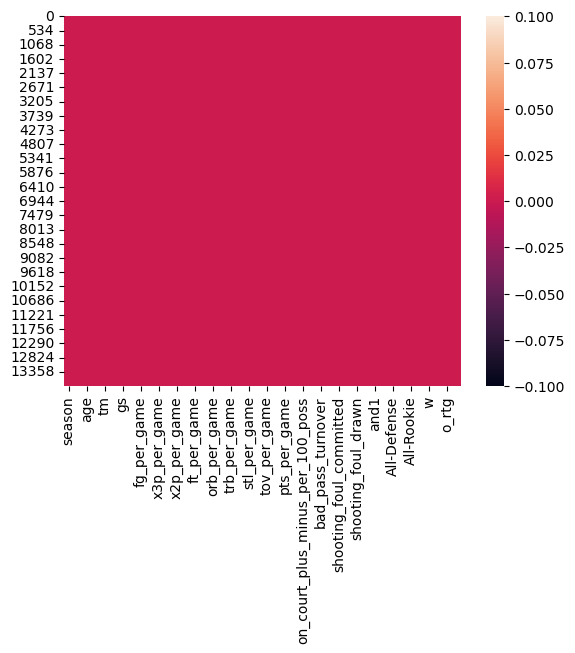

In [34]:
sns.heatmap(nba_data.isnull())

In [35]:
nba_data.head()

,season,player,age,experience,tm,g,gs,mp_per_game,fg_per_game,fga_per_game,...,and1,fga_blocked,All-Defense,All-NBA,All-Rookie,playoffs,w,l,o_rtg,d_rtg
0,2022,Aaron Gordon,26.0,8,DEN,75,75.0,31.7,5.8,11.1,...,33,52,0.0,0.0,0.0,True,48.0,34.0,114.5,112.1
1,2022,Austin Rivers,29.0,10,DEN,67,18.0,22.1,2.2,5.2,...,4,13,0.0,0.0,0.0,True,48.0,34.0,114.5,112.1
2,2022,Bol Bol,22.0,3,DEN,14,0.0,5.8,1.1,1.9,...,1,1,0.0,0.0,0.0,True,48.0,34.0,114.5,112.1
3,2022,Bones Hyland,21.0,1,DEN,69,4.0,19.0,3.3,8.3,...,7,38,0.0,0.0,1.0,True,48.0,34.0,114.5,112.1
4,2022,Bryn Forbes,28.0,6,DEN,35,1.0,17.4,2.9,6.9,...,5,13,0.0,0.0,0.0,True,48.0,34.0,114.5,112.1


<AxesSubplot:xlabel='mp', ylabel='Count'>

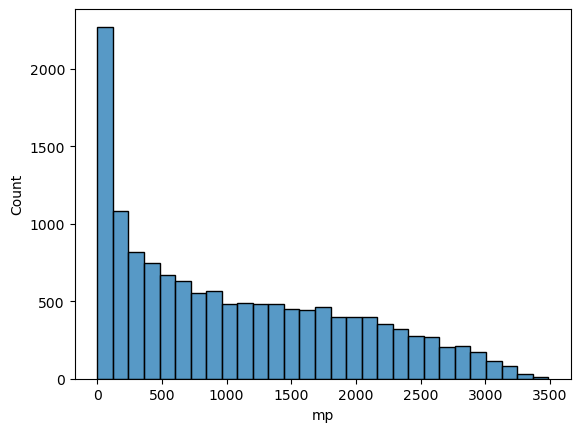

In [36]:
sns.histplot(nba_data['mp'])

In [37]:
print(nba_data[nba_data['All-NBA']==1]['mp'].mean())
print(nba_data[nba_data['All-NBA']==1]['mp'].min())
# As I can see there is a lot of low mp values and the lowest All-NBA mp is 70 so I will drop all below 70

2614.5193798449613
70


In [38]:
nba_data = nba_data[nba_data['mp']>=70]

In [39]:
nba_data.shape

(12274, 44)

In [40]:
nba_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12274 entries, 0 to 13890
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   season                            12274 non-null  int64  
 1   player                            12274 non-null  object 
 2   age                               12274 non-null  float64
 3   experience                        12274 non-null  int64  
 4   tm                                12274 non-null  object 
 5   g                                 12274 non-null  int64  
 6   gs                                12274 non-null  float64
 7   mp_per_game                       12274 non-null  float64
 8   fg_per_game                       12274 non-null  float64
 9   fga_per_game                      12274 non-null  float64
 10  x3p_per_game                      12274 non-null  float64
 11  x3pa_per_game                     12274 non-null  float64
 12  x2p_

In [41]:
nba_data.corr()['All-NBA']

season                              0.001798
age                                 0.012215
experience                          0.067470
g                                   0.132671
gs                                  0.244656
mp_per_game                         0.232407
fg_per_game                         0.358529
fga_per_game                        0.336570
x3p_per_game                        0.151482
x3pa_per_game                       0.149638
x2p_per_game                        0.346838
x2pa_per_game                       0.330441
ft_per_game                         0.396747
fta_per_game                        0.391554
orb_per_game                        0.098543
drb_per_game                        0.236569
trb_per_game                        0.203824
ast_per_game                        0.254101
stl_per_game                        0.190892
blk_per_game                        0.119365
tov_per_game                        0.307353
pf_per_game                         0.107605
pts_per_ga

<AxesSubplot:>

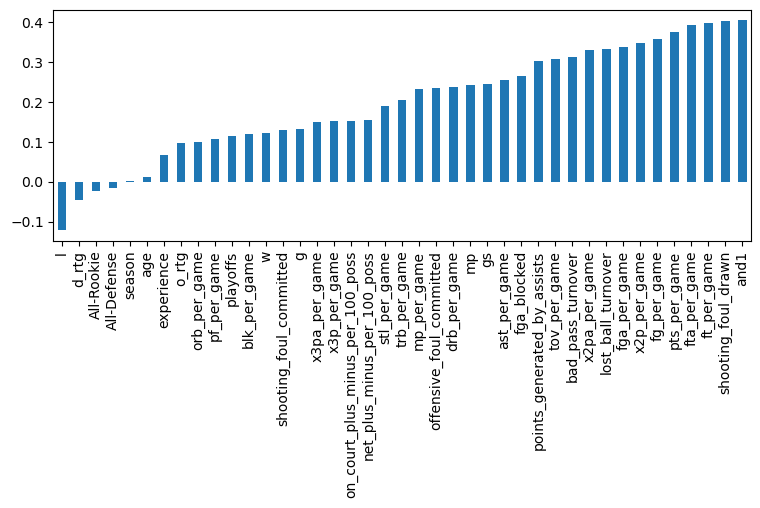

In [42]:
plt.figure(figsize=(9,3))
nba_data.corr()['All-NBA'].sort_values()[:-1].plot(kind='bar')

In [43]:
def combine_player(x):
    return x['player'] +  ' ' +str(x['season'])

nba_data['player_year'] = nba_data.apply(combine_player, axis=1)


#Now I got player with year linked, so now get rid off unnecessary team, season, player name and player_id
#And I delete additional data which is in another table

In [44]:
nba_data = nba_data.drop(['player','season'],axis=1)

Text(0.5, 1.0, 'Points/Minutes All-Rookie')

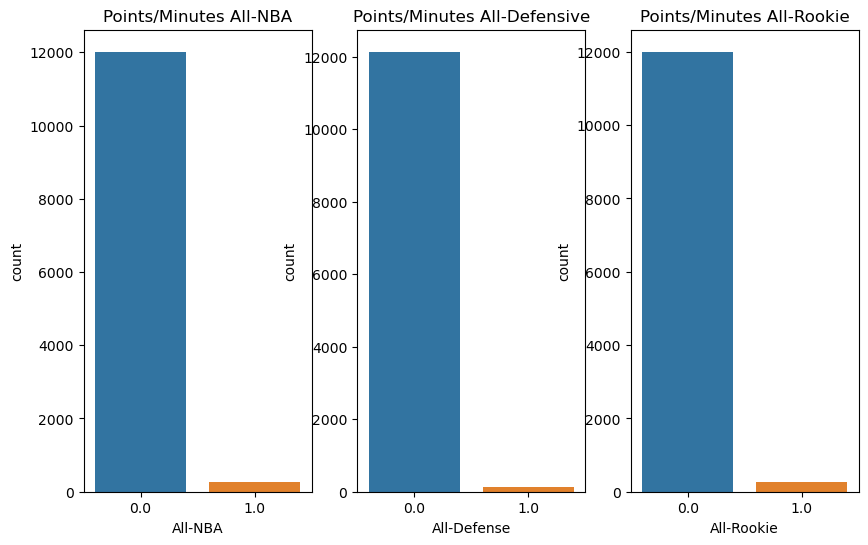

In [45]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(10,6))
j=0
for i in ['All-NBA', 'All-Defense','All-Rookie']:
    sns.countplot(x=nba_data[i],ax=axes[j])
    j+=1
axes[0].set_title('Points/Minutes All-NBA')
axes[1].set_title('Points/Minutes All-Defensive')
axes[2].set_title('Points/Minutes All-Rookie')
#As I can see All teams are anomalies in the dataset

In [46]:
print(nba_data.groupby('All-NBA').count()['age'])
print(nba_data.groupby('All-Defense').count()['age'])
print(nba_data.groupby('All-Rookie').count()['age'])

All-NBA
0.0    12016
1.0      258
Name: age, dtype: int64
All-Defense
0.0    12140
1.0      134
Name: age, dtype: int64
All-Rookie
0.0    12002
1.0      272
Name: age, dtype: int64


In [47]:
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
cf.go_offline()
init_notebook_mode(connected=True)

In [48]:
nba_data.iplot(kind='scatter', x='pts_per_game',y='mp_per_game',mode='markers',size=4,text='player_year',color='blue',title='Points and Minutes Per Game Graph',xTitle='Points Per Game',yTitle='Minutes Per Game')

Text(0.5, 1.0, 'Points/Minutes All-Rookie')

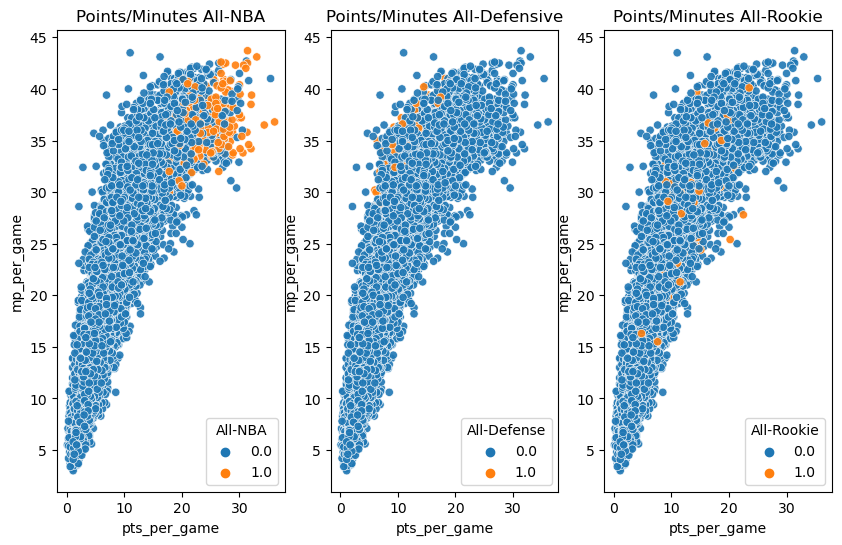

In [49]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(10,6))
j=0
for i in ['All-NBA', 'All-Defense','All-Rookie']:
    sns.scatterplot(data=nba_data,x='pts_per_game',y='mp_per_game',hue=i, ax=axes[j],alpha=0.9)
    j+=1
axes[0].set_title('Points/Minutes All-NBA')
axes[1].set_title('Points/Minutes All-Defensive')
axes[2].set_title('Points/Minutes All-Rookie')
#WNIOSKI

# Classificator 

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
X = nba_data.drop(['All-NBA','tm','player_year'],axis=1)
y = nba_data['All-NBA']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

reg_log = LogisticRegression(max_iter=100)

reg_log.fit(X_train,y_train)
preds = reg_log.predict(X_test)
print(classification_report(y_test,preds))
print(confusion_matrix(y_test,preds))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3598
         1.0       0.62      0.45      0.52        85

    accuracy                           0.98      3683
   macro avg       0.80      0.72      0.76      3683
weighted avg       0.98      0.98      0.98      3683

[[3575   23]
 [  47   38]]


C:\Users\tomai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
randomf_preds = rf_model.predict(X_test)
print(confusion_matrix(y_test,randomf_preds))
print(classification_report(y_test,randomf_preds))
print('Accuracy Score:',accuracy_score(y_test,randomf_preds))

[[3585   13]
 [  36   49]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3598
         1.0       0.79      0.58      0.67        85

    accuracy                           0.99      3683
   macro avg       0.89      0.79      0.83      3683
weighted avg       0.99      0.99      0.99      3683

Accuracy Score: 0.9866956285636709


In [55]:
# Random Forest hyperparameter tuning

In [56]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

random_forest_model = RandomForestClassifier()



In [58]:
rf_random = RandomizedSearchCV(estimator = random_forest_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)
rf_random.best_params_


Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [59]:
rf_preds = rf_random.predict(X_test)
print(confusion_matrix(y_test,rf_preds))
print(classification_report(y_test,rf_preds))
print('Accuracy Score:',accuracy_score(y_test,rf_preds))

[[3585   13]
 [  34   51]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3598
         1.0       0.80      0.60      0.68        85

    accuracy                           0.99      3683
   macro avg       0.89      0.80      0.84      3683
weighted avg       0.99      0.99      0.99      3683

Accuracy Score: 0.9872386641325007


The hyperparameter tuning yielded minimal improvements, and the process is significantly time-consuming to build this model.
Despite the scarcity of anomalies we aim to detect, the performance remains fairly satisfactory
Furthermore, the performance of the logistic regression model didn't do well. Maybe standardization could help it work better, or we could try mining more data.